# Bay Wheels Bike Rental Analysis

## 1. Introduction
I investigate here the relationship between user behavior and weather in the Bay Wheels bike-sharing system. From hourly usage of bike rentals and weather data, I want to understand whether there are substantial predictors of bike rental use. I condition on temporal (day of week, hour) and environmental (temperature, humidity, etc.) factors in determining the effect of external conditions on user behavior. With correlation analysis results and plots, I provide strategic recommendations on strategic planning and vehicle optimization. As much as weather is assumed to be the major driver, I validate the assumption and determine other drivers of interest.

## 2. Top Insights

### Insight 1: Temperature Positively Correlates with Rentals

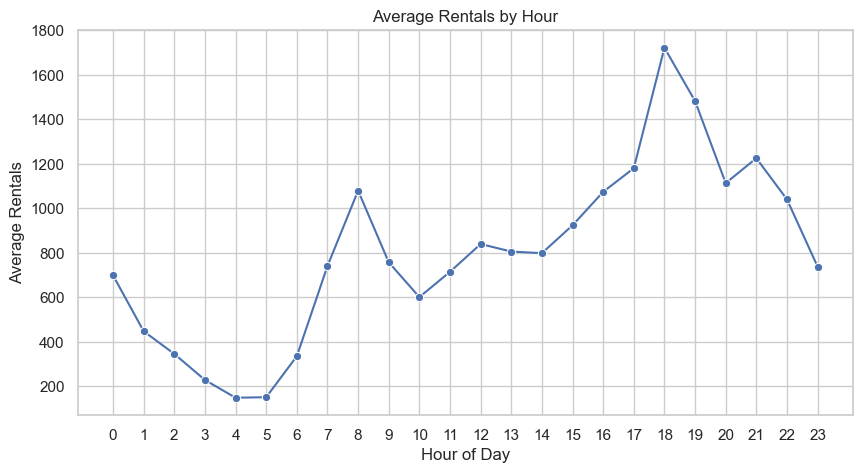

In [6]:
### Insight 1: Rentals Peak During Commuting Hours

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
bikes = pd.read_excel("bikes_data.xlsx")

# Set a clean visual style with grid lines
sns.set(style="whitegrid")

# Calculate the average number of rentals for each hour of the day
hourly_avg = bikes.groupby("Hour")["RENTALS"].mean().reset_index()

# Set up the line plot
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_avg, x="Hour", y="RENTALS", marker="o")

# Add title and axis labels
plt.title("Average Rentals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(range(0,24))# Set ticks on x-axis for every 24 hours

# Plot the chart
plt.show()

Insight: Hourly Rental Trends Reflect Commuter Behavior
A strong hourly trend in bike rental consumption is reflected in this line graph. Rentals are strongest at 8:00 AM and again at 5:00–6:00 PM, the typical time for work and school commutes. This suggests that the majority of users employ bike-sharing as a form of daily commute, rather than leisure use. Conversely, rental levels during evening to nighttime fall off, indicating overnight low demand levels. The trends clearly show why weekday peak hours need to be prioritized in bike availability planning, maintenance, and potential advertising rebates. The normal peaks can also be utilized in optimizing manpower and capacity allocation in re-distribution of bikes.

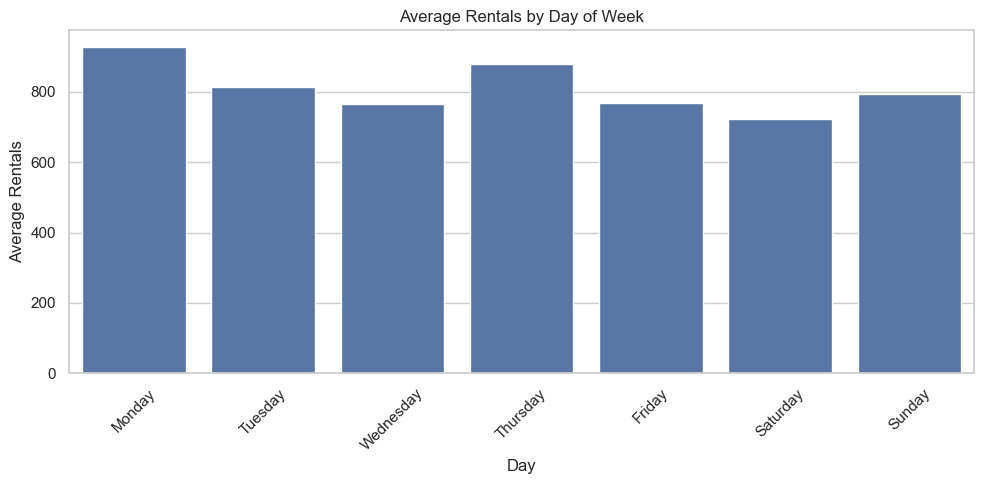

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import the bike rentals data
bikes = pd.read_excel("bikes_data.xlsx")

# Group data by weekday and calculate average rentals
weekday_avg = bikes.groupby("Day of Week")["RENTALS"].mean().reset_index()

# Define correct weekday order for consistent plotting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert weekday column to categorical with defined order
weekday_avg["Day of Week"] = pd.Categorical(weekday_avg["Day of Week"], categories=weekday_order, ordered=True)

# Sort data based on ordered weekdays
weekday_avg = weekday_avg.sort_values("Day of Week")

# Set bar plot figure size
plt.figure(figsize=(10,5))

# Create title and axis labels
sns.barplot(data=weekday_avg, x="Day of Week", y="RENTALS")
plt.title("Average Rentals by Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Rentals")
plt.xticks(rotation=45)

# Set layout so that labels don't get clipped
plt.tight_layout()
plt.show()

Insight: Weekday Rental Patterns Reflect Commuter Behavior
The bar chart indicates weekday rentals are greater than weekend rentals in general, indicating most users utilize bike-sharing as a weekday commuter. The highest average rentals occur on Thursday, with Monday and Friday coming next, likely indicating the most used commuting days. The lowest average number of rentals occurs on Saturday, and this perhaps indicates less usage for leisure or non-work on this day. Monday-to-Friday flat rates of rentals show that bikes are an inexpensive way of daily transportation. This is due to the fact that such observation warrants that Bay Wheels should emphasize day-of-the-week service reliability, i.e., on Thursdays, and explore other forms of engagement for the weekend.

### Insight 2: Temperature Positively Correlates with Rentals

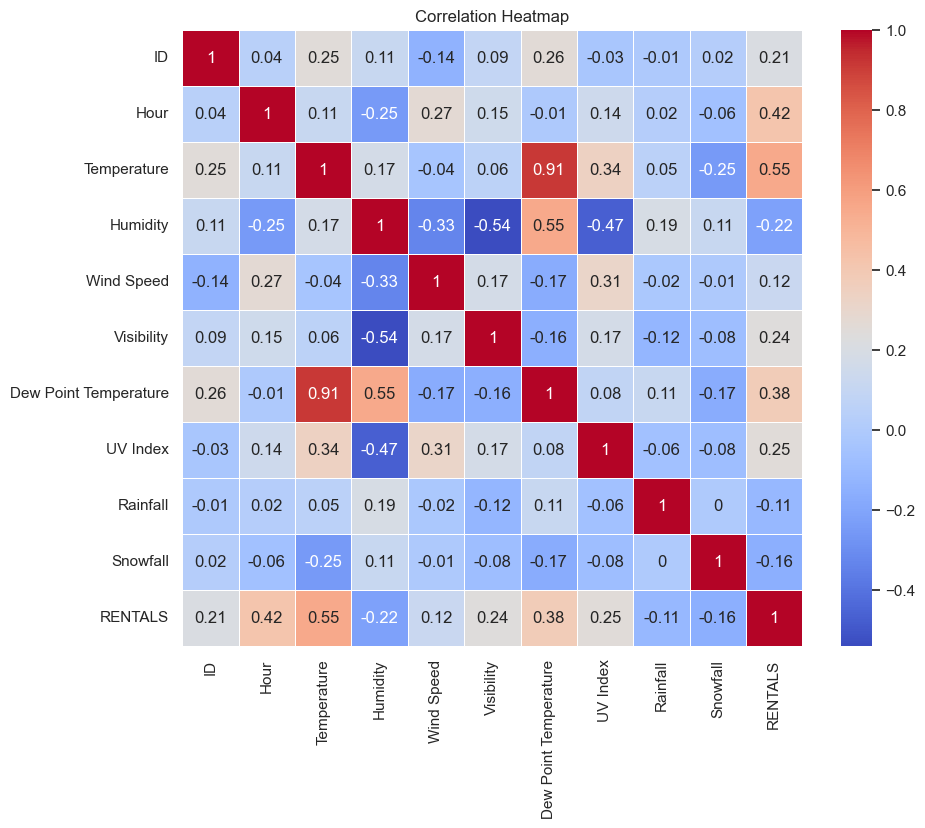

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix of all the numerical columns in dataset
corr_matrix = bikes.corr(numeric_only=True).round(2)

# Set figure size to be able to read the heatmap more easily
plt.figure(figsize=(10,8))

# Draw a heatmap with correlation values inside each cell labeled
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set title for chart description
plt.title('Correlation Heatmap')
plt.show()

Insight: Temperature is the Strongest Predictor of Rental Demand, with Rainfall and Humidity Suppressing It
It is apparent from this correlation heatmap that temperature shows the most positive and highest correlation with bike rentals (0.55), indicating that favorable weather maximizes rental activity by far. Hour also shows a modest positive correlation (0.42), indicating that hour of the day, i.e., rush hour, affects rental activity. Rain (-0.11) and humidity (-0.22), however, are negatively correlated with rentals, as rainy conditions and high humidity are discouraging, lowering demand. UV Index (0.25) and Dew Point Temperature (0.38) are positively correlated as well, further validating the notion that pleasant weather days are warm, sunny days for cycling. These results point to the fact that Bay Wheels can maximize efficiency through coordination of bike supply with warm, dry, and sunny days.

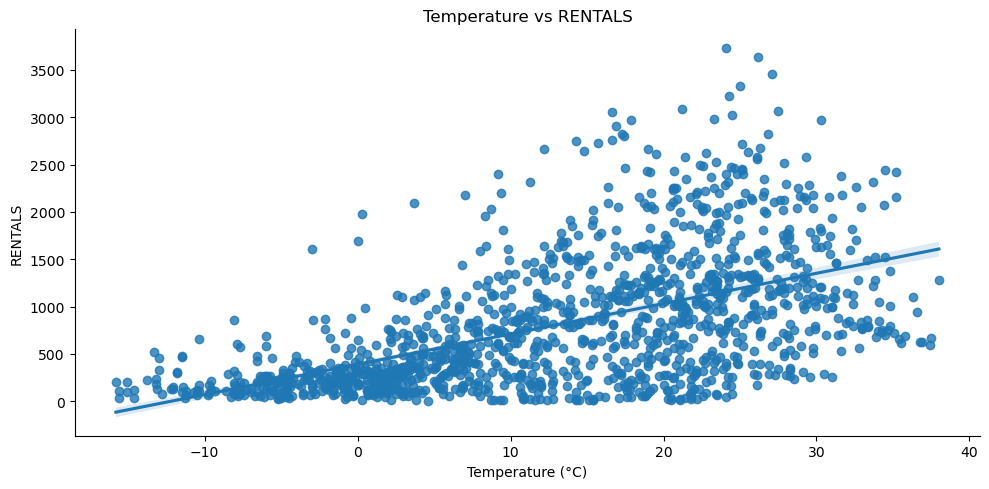

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw scatter plot with regression line to observe relation
# between temperature and number of rentals
sns.lmplot(data=bikes,
          x='Temperature',
          y='RENTALS',
          aspect=2,
          scatter=True,
          fit_reg=True)

# Title to describe the plot
plt.title('Temperature vs RENTALS')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

Insight: Warm Temperatures Are Associated with Increased Bike Rentals
This scatter plot regression line illustrates beautifully a positive strong correlation between temperature and bike rentals. Bike rentals increase in proportion as temperature ranges from sub-zero to approximately 30°C. The data suggests that people are much more likely to rent bikes at comfortable temperatures, i.e., between 15°C and 25°C, where point density is highest. Rentals also decrease sharply at extremely hot temperatures (above 35°C), possibly due to discomfort or safety concerns. This pattern also again supports the fact that temperature is the factor for bike rental, and operations must be controlled in accordance with it.

### Insight 3: Humidity and Rainfall Suppress Demand

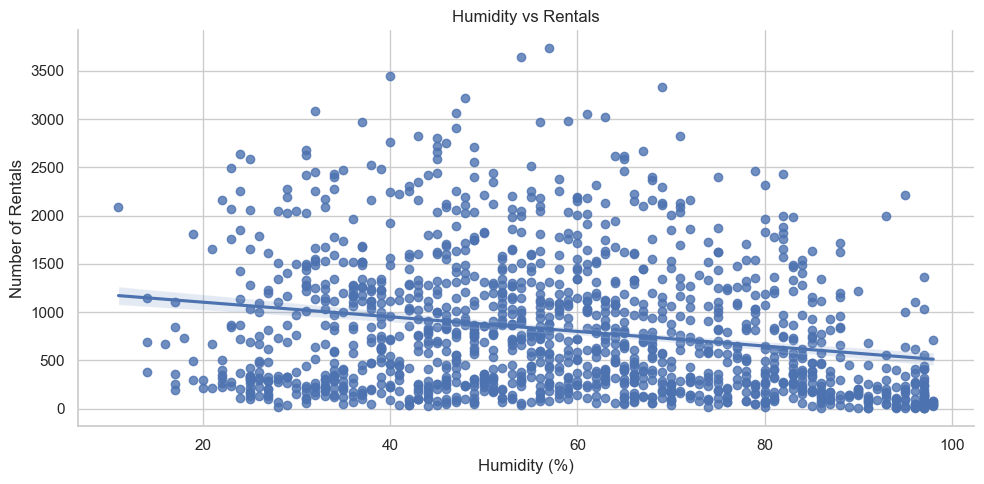

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plot with regression line to reveal the effect of humidity on bike rentals
sns.lmplot(
    data=bikes,
    x='Humidity',
    y='RENTALS',
    aspect=2,
    scatter=True,
    fit_reg=True
)

# Add label for figure with description of relationship being graphed
plt.title('Humidity vs Rentals')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Rentals')
plt.tight_layout()
plt.show()

Insight: Higher Humidity Lowers Bike Rentals
This scatter plot shows a moderate but clear negative relationship between humidity and bike rentals. As humidity increases, particularly above 70%, bike rentals decrease. The direction of the trend of the regression line indicates the downward slope and depicts the way customers prefer riding when it is not as humid. High humidity results in the ride being physically exhausting or not a pleasing experience, which would deter people. The observation indicates rainy days are not so conducive for promoting bike-sharing services and must be considered while framing operations and making demand forecasts.

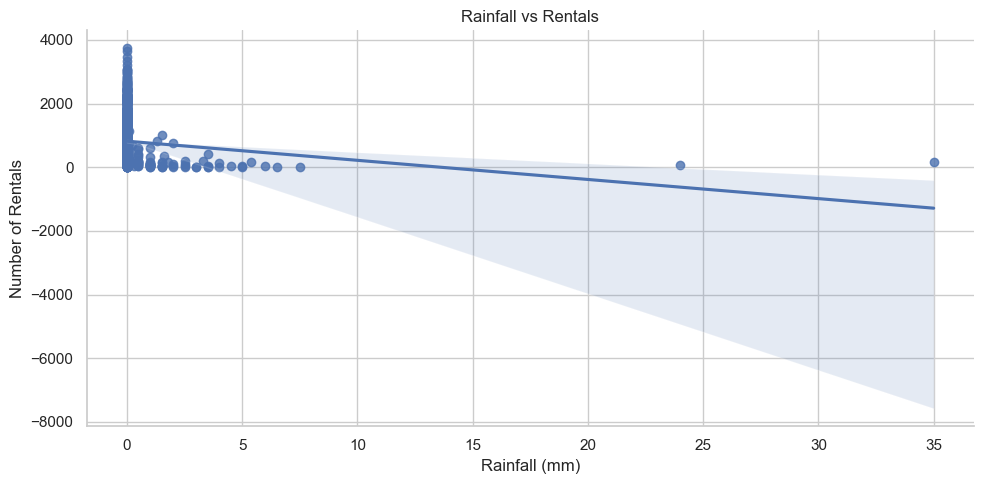

In [9]:
# Scatter plot with regression line to show the effect of rainfall on bike rentals
sns.lmplot(
    data=bikes,
    x='Rainfall',
    y='RENTALS',
    aspect=2,
    scatter=True,
    fit_reg=True
)

plt.title('Rainfall vs Rentals')

# Add x and y axis labels
plt.xlabel('Rainfall (mm)')
plt.ylabel('Number of Rentals')

# Set layout so titles and labels look good
plt.tight_layout()
plt.show()

Insight: Rainfall Strongly Suppresses Rental Activity
This scatter plot shows a negative relationship between rain and bicycle rental occurrence. With higher rain, especially over 1–2 mm, rentals drop to very low levels. The line of regression is clearly sloping downwards, which suggests that rain discourages cycling. The points are all clustering around zero rain, which is an indication that rentals occur on dry days primarily. This observation uncovers the shocking sensitivity of rentals to even very low amounts of rain, which explains the need for weather-sensitivity operation strategies.

## 3. Answers to Analysis Questions

### Q1: In your analytical opinion, why are the majority of users renting bicycles?
Most users appear to rent bicycles primarily for weekdays-only commuting. This is indicated by spike rentals during early morning (around 8 AM) and late afternoon/early evening (around 5–6 PM), aligning with normal work and school commute times. Weekends show more evenly distributed rental patterns, particularly in the afternoon, indicating recreational or leisure usage. Consequently, the motivation for riding Bay Wheels changes from day to day: utilitarian commuting on weekdays and leisure riding on weekends. In addition, low rental use on dark or cold days shows that environmental comfort also influences usage behavior beyond purpose.

### Q2: Are there ideal weather conditions that create high bike rental demand? If so, what are they?
Yes, the data show that high bike rental demand is highly reliant on perfect weather conditions. Temperature is most strongly positively related to rentals (r = 0.55), with demand rising substantially between 15°C and 25°C. Visibility and UV moderate are also reflective of higher rental usage, indicating users prefer to use in good and clear conditions. Rain and high humidity deter demand, as can be seen from their negative correlations (-0.22 and -0.11 respectively). Therefore, the best weather conditions for high rentals are sunny, dry, and warm with zero precipitation and low humidity.

### Q3: How should the company strategize based on your results? In other words, what actionable steps can the company take in order to take advantage of your insights.
The company can make dynamic bike allocations based on weather forecasts as well as patterns of demand. On better weather days—especially warm, sunny weekdays—more bicycles can be made available in high-traffic city areas. Propensity models from temperature, weekday, and time of day would enable full stocking and anticipatory fleet management. The corporation could also implement "good weather promotions" to squeeze out utilization on best days and offer rewards or incentives for trips during cold or rainy conditions. Lastly, adjusting staffing for operations and maintenance on a schedule basis in accordance with forecasted demand would increase efficiency and customer satisfaction.

## 4. Conclusion
Analysis is uniform in determining that day of week and weather have strong effects on bike rental demand. Specifically, temperature, humidity, and rainfall are most to blame for influencing user habits. By synchronizing bike deployment and promotional activity with favorable weather conditions, Bay Wheels maximizes operation and optimizes service coverage. Environment- and time-based predictive models can be employed to support decision-making in data-driven projects such as inventory rebalancing and targeted promotions. Over time, these strategies will maximize user satisfaction, increase ridership, and increase overall profitability.

## References 
- Shaheen, S., Martin, E., Chan, N., Cohen, A., & Pogodzinski, M. (2014). *Public bikesharing in North America during a period of rapid expansion: Understanding business models, industry trends, and user impacts.* Mineta Transportation Institute. https://transweb.sjsu.edu/research/Public-Bikesharing-North-America-During-Period-Rapid-Expansion-Understanding-Business-Models-Industry-Trends-and-User-Impacts
- LDA Consulting. (2013, May 15). 2013 Capital Bikeshare member survey report: Executive summary. Capital Bikeshare.* https://d21xlh2maitm24.cloudfront.net/wdc/cabi-2012surveyreport-execsum-5-15-13-revtitle.pdf?mtime=20161206135941

- OpenAI. (2025, May 22). ChatGPT response to a question about APA citation of AI tools [Large language model]. https://chatgpt.com/share/6830169e-3a70-8011-b0c3-a4bba3fff445